In [60]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [61]:
#importing our cancer dataset
dataset = pd.read_csv('data/cancer.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [62]:
dataset.head()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [63]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


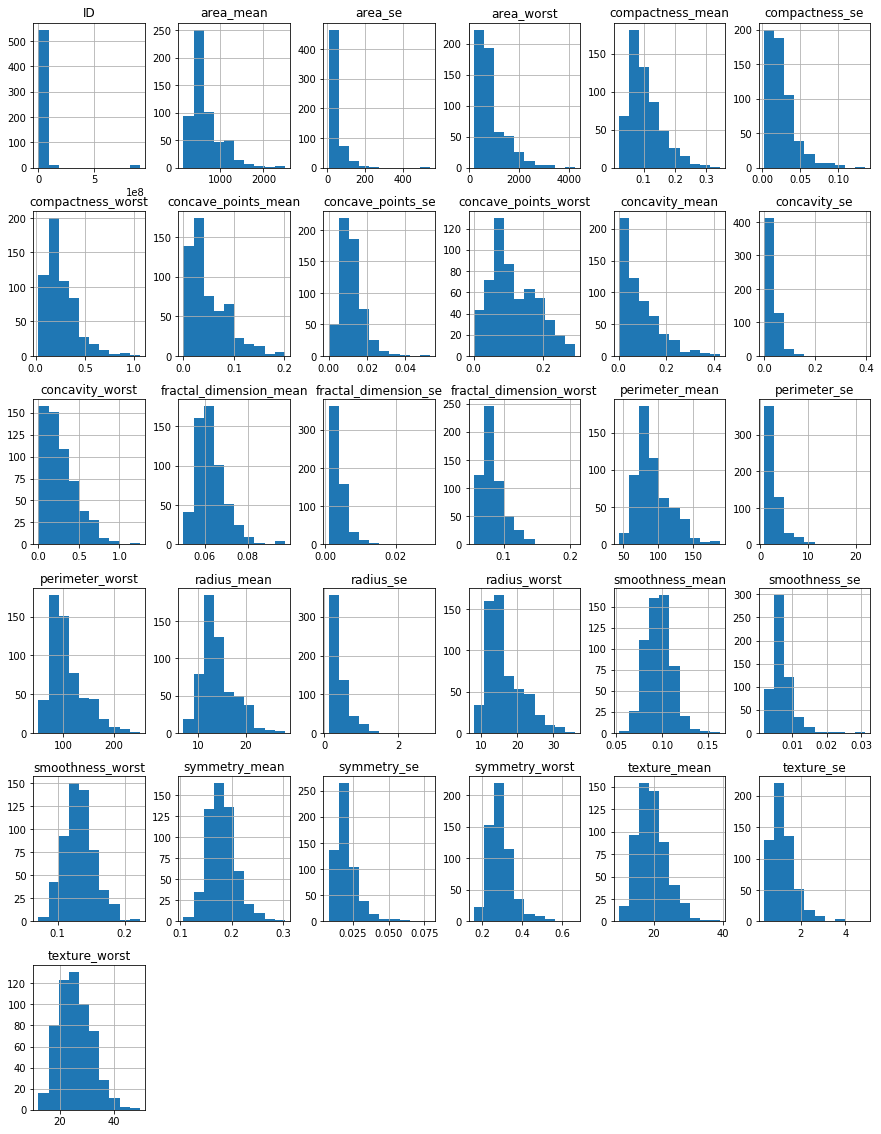

In [64]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax);

In [65]:
dataset.isnull().sum()
dataset.isna().sum()

ID                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [66]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [68]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [69]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
Y_pred = classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[87  3]
 [ 3 50]]


### K Nearest Neighbors

In [72]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
Y_pred = classifier.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy of KNN classifier on test set: 0.95


In [74]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[89  1]
 [ 6 47]]


### Support Vector Machine

In [75]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
Y_pred = classifier.predict(X_test)
print('Accuracy of SVM (linear) classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy of SVM (linear) classifier on test set: 0.97


In [77]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[88  2]
 [ 2 51]]


### SVM - Radial Basis Function

In [78]:
#Using SVC method of svm class to use Kernel SVM Algorithm
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
Y_pred = classifier.predict(X_test)
print('Accuracy of SVM (rbf) classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy of SVM (rbf) classifier on test set: 0.97


In [80]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[88  2]
 [ 3 50]]


### Naive Bayes

In [81]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
Y_pred = classifier.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy of Naive Bayes classifier on test set: 0.92


In [83]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[84  6]
 [ 6 47]]


### Decision Tree Classifier

In [84]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [85]:
Y_pred = classifier.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on test set: 0.96


In [86]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[86  4]
 [ 2 51]]


### Random Forest

In [87]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [88]:
Y_pred = classifier.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy of Random Forest classifier on test set: 0.99


In [89]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[89  1]
 [ 1 52]]
